## **Customer Personality Analysis : Customer segmentation with clustering**

## **Context**
### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Content
Attributes

People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month



## **Task identification**
Customer personality analysis is a segmentation task which consists of grouping customers according to similar features.There are different types of customer segmentation based on features : demographic segmentation, geographic , psychographic , behavioural,... 

Based on available features in dataset (Date of customer's enrollment,Number of purchases, Number of days since customer's last purchase, amount spent), we can say that it's a behavioural customer segmentation.

**In this work, we will use a clustering algorithm to perform customer segmentation.** 


## **Table of content**

1) **Libraries import and data loading** 

2) **Feature engenieering**

3) **EDA**

4) **Preprocessing**

5) **Dimensionality reduction**  

6) **Clustering**  

7) **Profiling**  

### **1) Libraries import and data loading**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from datetime import datetime
import warnings
import sys
import os

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

All dataset columns are non null so data cleaning is not required.

In [5]:
warnings.filterwarnings('ignore')  # ignore notifications

### **2) Feature engenieering**  
We will compute new features:
- customer age
- number of years since enrollment
- total amount spent
- total number of kids
- total number of purchases
- rate of deals purchases over total purchases
- total number of accepted campaigns


Remove some features

Edit some categorical features if necessary

In [6]:
# finding non numeric columns
num_cols = df._get_numeric_data().columns
non_num_cols = list(set(df.columns) - set(num_cols))
print(non_num_cols)

['Marital_Status', 'Dt_Customer', 'Education']


In [7]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [8]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [9]:
def transform_data(df):
    df = compute_new_features(df)
    df = remove_features(df)
    df = factor_columns(df)
    #df = pd.concat([df, pd.get_dummies(df['Marital_Status'])], axis=1)  # Separate features for Alone and Partner
    return df
    
def compute_new_features(df,features_list=['age','fidelity_years','amount_spending','nb_children','nb_purchases','nb_camp']):
    # customer age
    if 'age' in features_list:
        df['Age'] = datetime.now().year - df['Year_Birth']  
    
    # number of years since enrollment
    if 'fidelity_years' in features_list:
        registration_year = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)
        current_year = datetime.now().year
        df['fidelity_years'] = current_year - registration_year
        
    # total amount spent
    if 'amount_spending' in features_list:
        df['amount_spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
          'MntGoldProds']].sum(axis=1)
        
    # total number of children
    if 'nb_children' in features_list:
        df['nb_children'] = df['Kidhome']+df['Teenhome']
        df["Is_Parent"] = np.where(df.nb_children > 0, 1, 0)

        
    # total number of purchases
    if 'nb_purchases' in features_list:
        df['nb_purchases'] = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)
        df['deal_purchases_rate'] = df['NumDealsPurchases']/np.maximum(df['nb_purchases'],np.ones(df.shape[0]))
        
    if 'nb_camp'in features_list:
        df['nb_camp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                     'Response']].sum(axis=1)
    
    return df
    
        
def remove_features(df,features_list=['ID','Year_Birth','Dt_Customer','Kidhome','Teenhome','NumDealsPurchases',
                                      'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                                      'AcceptedCmp4', 'AcceptedCmp5','Response']):
    df = df.drop(columns=features_list)
    return df
    
        
def factor_columns(df):
    df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", 
                                             "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
    
    df['Marital_Status'] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone",
    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
     
    return df
    

In [10]:
df_tr = transform_data(df)

In [11]:
df_tr.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_CostContact,Z_Revenue,Age,fidelity_years,amount_spending,nb_children,Is_Parent,nb_purchases,deal_purchases_rate,nb_camp
0,Graduate,Alone,58138.0,58,635,88,546,172,88,88,...,3,11,65,10,1617,0,0,25,0.120000,1
1,Graduate,Alone,46344.0,38,11,1,6,2,1,6,...,3,11,68,8,27,2,1,6,0.333333,0
2,Graduate,Partner,71613.0,26,426,49,127,111,21,42,...,3,11,57,9,776,0,0,21,0.047619,0
3,Graduate,Partner,26646.0,26,11,4,20,10,3,5,...,3,11,38,8,53,1,1,8,0.250000,0
4,Postgraduate,Partner,58293.0,94,173,43,118,46,27,15,...,3,11,41,8,422,1,1,19,0.263158,0


### **3) EDA**

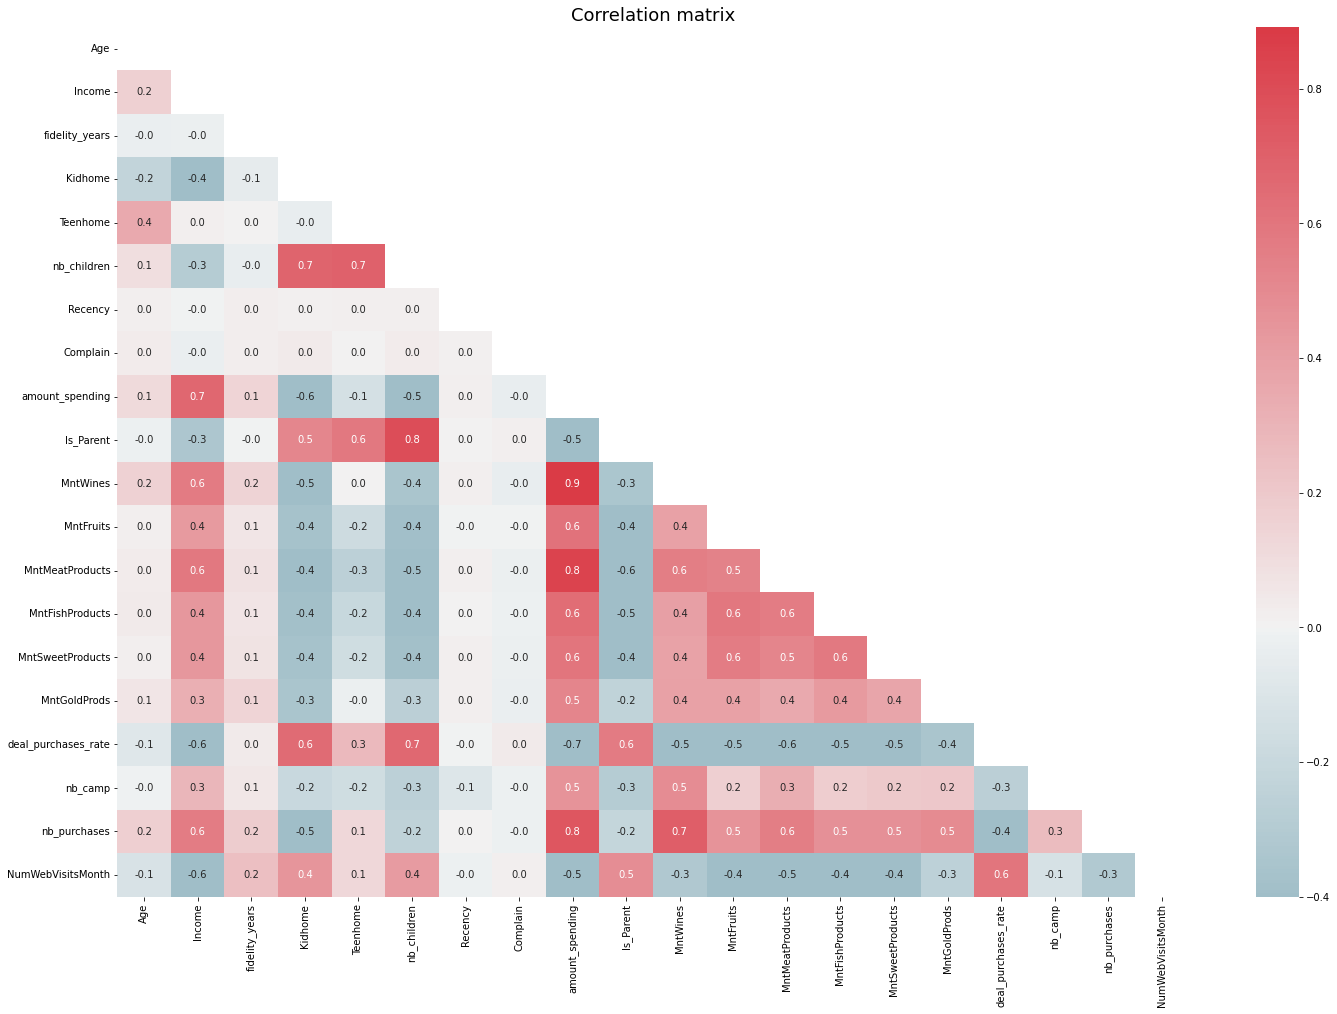

In [12]:
# Correlation matrix
to_corr = ['Age', 'Income', 'fidelity_years','Kidhome', 'Teenhome','nb_children', 'Recency', 'Complain', 'amount_spending',
           'Is_Parent','Marital_Status','Education','MntWines', 'MntFruits', 'MntMeatProducts', 
           'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'deal_purchases_rate', 
           'nb_camp', 'nb_purchases', 'NumWebVisitsMonth', 
           ]

cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = np.triu(df[to_corr].corr())
plt.figure(figsize=(24, 16))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(df[to_corr].corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, cmap=cmap, mask=matrix)

plt.show()

**Notes**
- Customers with high income are those who spent the most;
- Meat and Wine are the top products which increase the amount;
- Customers with kids and those with low income prefer deal purchases
- Complain and recency are not related to other features

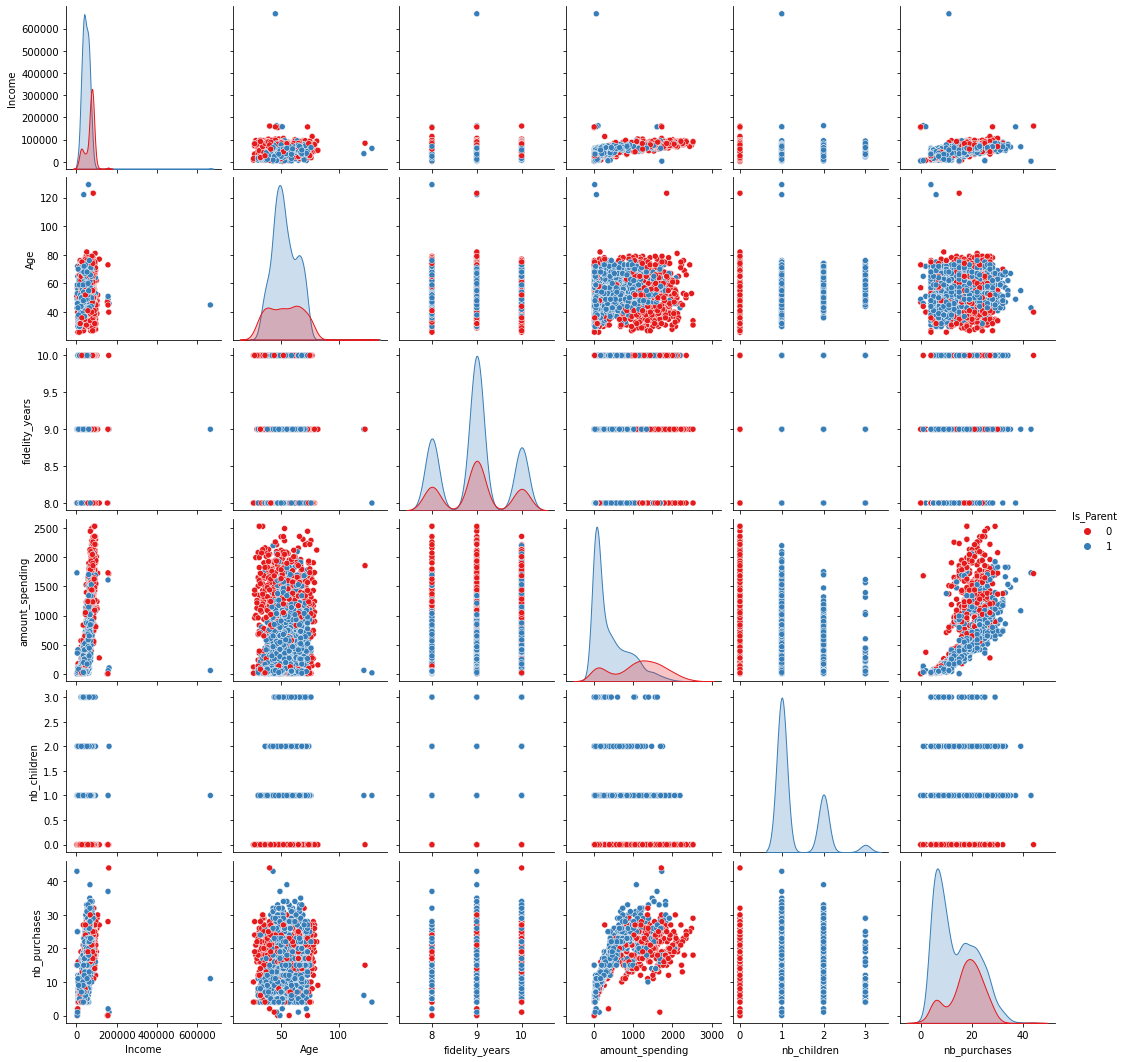

In [13]:
# Pairplots
to_plot = ['Income','Age', 'fidelity_years', 'amount_spending','nb_children',
           'nb_purchases', 'Is_Parent']
sns.pairplot(df_tr[to_plot], hue='Is_Parent', palette='Set1')
plt.show()

**Notes**
- There are outliers for Age distribution over 100 years
- There are outliers for Income distribution over 600 k 

### 4) **Preprocessing**

We will remove outliers, encode categorical features and drop useless features.

In [14]:
def preprocess(df,encode=['Marital_Status','Education'],useless=['Complain','Z_CostContact','Z_Revenue','amount_spending']):
    # Removing outliers
    df = df[(df["Age"]<100)]
    df = df[(df["Income"]<600000)]
    
    # encode categorical features
    enc = LabelEncoder()
    for ft in encode:
        df[ft]= enc.fit_transform(df[ft])
    
    # drop useless features
    df = df.drop(useless,axis=1)
    
    # cleaning data
    df.dropna(inplace=True)
    return df

In [15]:
df_tr.isna().sum()

Education               0
Marital_Status          0
Income                 24
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Z_CostContact           0
Z_Revenue               0
Age                     0
fidelity_years          0
amount_spending         0
nb_children             0
Is_Parent               0
nb_purchases            0
deal_purchases_rate     0
nb_camp                 0
dtype: int64

In [16]:
df_prep = preprocess(df_tr)

In [17]:
df_prep.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,fidelity_years,nb_children,Is_Parent,nb_purchases,deal_purchases_rate,nb_camp
0,0,0,58138.0,58,635,88,546,172,88,88,...,10,4,7,65,10,0,0,25,0.120000,1
1,0,0,46344.0,38,11,1,6,2,1,6,...,1,2,5,68,8,2,1,6,0.333333,0
2,0,1,71613.0,26,426,49,127,111,21,42,...,2,10,4,57,9,0,0,21,0.047619,0
3,0,1,26646.0,26,11,4,20,10,3,5,...,0,4,6,38,8,1,1,8,0.250000,0
4,1,1,58293.0,94,173,43,118,46,27,15,...,3,6,5,41,8,1,1,19,0.263158,0


In [18]:
# Data scaling
scaler = StandardScaler()
scaler.fit(df_prep)
df_final = pd.DataFrame(scaler.transform(df_prep),columns= df_prep.columns )

In [19]:
df_final.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,fidelity_years,nb_children,Is_Parent,nb_purchases,deal_purchases_rate,nb_camp
0,-0.893586,-1.349603,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,2.503607,-0.555814,0.692181,1.018352,1.499086,-1.264598,-1.581139,1.317945,-0.541422,0.617244
1,-0.893586,-1.349603,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,-0.571340,-1.171160,-0.132545,1.274785,-1.417341,1.404572,0.632456,-1.159273,1.377412,-0.502808
2,-0.893586,0.740959,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,-0.229679,1.290224,-0.544908,0.334530,0.040872,-1.264598,-1.581139,0.796425,-1.192455,-0.502808
3,-0.893586,0.740959,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,-0.913000,-0.555814,0.279818,-1.289547,-1.417341,0.069987,0.632456,-0.898513,0.627867,-0.502808
4,0.571657,0.740959,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,0.111982,0.059532,-0.132545,-1.033114,-1.417341,0.069987,0.632456,0.535666,0.746217,-0.502808


### **4) Dimensionality reduction**

The dimensionality reduction problem is used in the following situations:
* There are a lot of features in the dataset, and we want to reduce their number, leaving as much information as possible
* We have many features in the dataset, and we want to visualize the data (for example, in 3D space)
* Solving the problem of multicollinearity

There are many different options for dimensionality reduction, which are based on different methods, for example:
* Principal component analysis (PCA)
* Uniform Manifold Approximation and Projection (UMAP)
* t-distributed Stochastic Neighbor Embedding (t-SNE)

The most commonly used dimensionality reduction algorithm is PCA, and we also use it in this work.  
Essentially, in PCA we make a transition from one variable space to another, with the new space containing fewer variables (n_component), where the new variables are uncorrelated and are the weighted sum of the old variables.  
As a result we get m variables: {PC1, PC2, PC3... PCm} , where PC1 will receive the most information(maximum sample variance), PC2 - less, and so on (A variable is considered informative if it has a high sample variance).  
8 components will be used in this work.

In [20]:
%pip install umap-learn

In [23]:
import umap
def dim_reduction(data,n_components,methods=["PCA","TSNE","UMAP"]):
    reducers = {}
    embeddings = {}
    for reducer in methods:
        if reducer == "PCA":
            reducers[reducer] = PCA(n_components=n_components, random_state=42)
            
        elif reducer == "UMAP":
            reducers["UMAP"] = umap.UMAP(
                      n_neighbors=50,
                      min_dist=0.005,
                      metric='correlation',
                      n_components=n_components,
                     random_state=42)
        else:
            reducers["TSNE"] = TSNE(n_components=n_components, random_state=42,verbose=0)
            
        
    for name,red in reducers.items():
        embeddings[name] = pd.DataFrame(red.fit_transform(data), columns =([f'dim{i}' for i in range(1, n_components + 1)]))
        embeddings[name].index = data.index
   
    return reducers,embeddings

In [24]:
N_COMPONENTS = 3
reducers,embeddings = dim_reduction(df_final,N_COMPONENTS,methods=["PCA","TSNE","UMAP"])

In [25]:
embeddings['PCA'].describe().T

,count,mean,std,min,25%,50%,75%,max
dim1,2212.0,-3.212219e-18,2.803536,-6.700638,-2.600924,-0.644333,2.495964,7.497292
dim2,2212.0,-6.424437e-18,1.399754,-4.115500,-0.965283,0.154535,0.984363,4.155560
dim3,2212.0,7.307797e-17,1.139508,-3.055881,-0.818842,-0.048139,0.776489,5.240679


In [26]:
embeddings['UMAP'].describe().T

,count,mean,std,min,25%,50%,75%,max
dim1,2212.0,5.155474,2.582490,0.918979,2.663221,4.820872,7.967550,9.500890
dim2,2212.0,8.427860,1.546385,4.752990,7.565977,8.839599,9.605976,10.738589
dim3,2212.0,7.853118,1.519952,5.274532,6.572914,7.658632,9.153990,11.042274


In [28]:
embeddings['TSNE'].describe().T

,count,mean,std,min,25%,50%,75%,max
dim1,2212.0,0.186899,15.146336,-32.859772,-11.327190,-0.515127,10.339989,32.577091
dim2,2212.0,-0.307600,10.290407,-26.092003,-6.405435,1.319033,6.805265,22.161266
dim3,2212.0,0.084773,10.585344,-24.079538,-7.594684,-0.190825,7.925835,25.513554


Plotting customers data in 3D dimension

In [29]:
#A 3D Projection Of Data In The Reduced Dimension
def plot_embeddings(embeddings):
    fig = plt.figure(figsize=(20,6))
    start = 130
    for name,df_red in embeddings.items():    
        x =df_red["dim1"]
        y =df_red["dim2"]
        z =df_red["dim3"]
        ax = fig.add_subplot(start+1,projection="3d")
        ax.scatter(x,y,z, c="blue", marker="o" )
        ax.set_title("A 3D Projection with {}".format(name))
        start += 1
    plt.show()

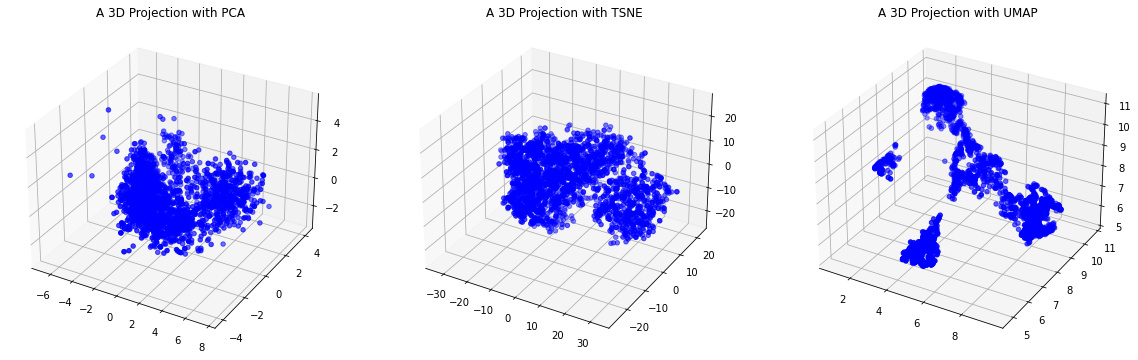

In [30]:
plot_embeddings(embeddings)

### **5) Clustering**

We will apply clustering algorithms on UMAP embeddings, based on this we will get labels for all objects, then we will combine the label column for objects with df_prep in order to get information about clusters.

We will test :
- Agglomerative  clustering
- SectralClustering
- HDBSCAN


In [31]:
%pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 37.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=3425816 sha256=59706c9b4073eff2c623edbd8667a3840c8218037bb968fd98ac06f750fde1c6
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [72]:
nb_clusters = 4
import hdbscan
import time 
from sklearn import metrics 

spectral_c = SpectralClustering(n_clusters=nb_clusters, eigen_solver='arpack',
        affinity="nearest_neighbors")
agglomerative = AgglomerativeClustering(n_clusters=nb_clusters)


hdbsan_c = hdbscan.HDBSCAN(min_cluster_size=60,min_samples=15)

clustering_algorithms = (
        ('AgglomerativeClustering',agglomerative),
        ('SpectralClustering', spectral_c),
        ('HBDSCAN',hdbsan_c)
        )

In [138]:
def compare_clustering_algos(X,clustering_algorithms):
    plot_num = 1
    
    labels = {}
    res = pd.DataFrame(index=["Computation time", "N_clusters","Silhouette score"])
    
    start = 140
    x =X[:,0]
    y =X[:,1]
    z =X[:,2]
    
    fig = plt.figure(figsize=(20,5))
    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        y_pred = algorithm.fit_predict(X)
        t1 = time.time()
        labels[name] = y_pred
        res.loc[:,name] = (t1 - t0, len(np.unique(y_pred)), metrics.silhouette_score(X,y_pred))
        ax = fig.add_subplot(start+1,projection="3d")
        scatter =ax.scatter(X[:, 0],X[:, 1],X[:, 2], c=y_pred, marker="o",linewidths= 0.2)
        legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
        ax.add_artist(legend1)
        ax.set_title("A Clustering with {}".format(name))
        ax.legend()
        start += 1
    plt.show()

    return res,labels

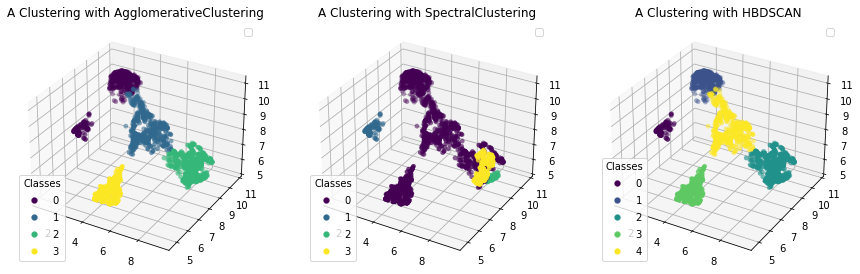

In [139]:
res,labels = compare_clustering_algos(np.array(embeddings["UMAP"]),clustering_algorithms)

In [82]:
res

,AgglomerativeClustering,SpectralClustering,HBDSCAN
Computation time,0.161101,1.137530,0.049207
N_clusters,4.000000,4.000000,5.000000
Silhouette score,0.651918,0.146274,0.679491


In [83]:
labels

{'AgglomerativeClustering': array([0, 3, 0, ..., 0, 1, 2]),
 'SpectralClustering': array([0, 0, 0, ..., 0, 1, 0], dtype=int32),
 'HBDSCAN': array([1, 3, 1, ..., 1, 4, 2])}

### Notes:  
We can see that, HDBSCAN has the lowest computation time compared to Agglomerative and spectral clusterings. We can also observe it has the highest silhouette score although the number of clusters increase by 1. We can conclude that the best clustering pipeline is : UMAP projection on 3 components (dimension reduction) + HDBSCAN.

In [85]:
y_hat_AC = labels['HBDSCAN']
df_red = embeddings['UMAP']
df_red['Clusters'] = y_hat_AC
df_prep['Clusters'] = y_hat_AC

In [117]:
df_prep.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,Age,fidelity_years,nb_children,Is_Parent,nb_purchases,deal_purchases_rate,nb_camp,Clusters
0,0,0,58138.0,58,635,88,546,172,88,88,...,4,7,65,10,0,0,25,0.120000,1,1
1,0,0,46344.0,38,11,1,6,2,1,6,...,2,5,68,8,2,1,6,0.333333,0,3
2,0,1,71613.0,26,426,49,127,111,21,42,...,10,4,57,9,0,0,21,0.047619,0,1
3,0,1,26646.0,26,11,4,20,10,3,5,...,4,6,38,8,1,1,8,0.250000,0,2
4,1,1,58293.0,94,173,43,118,46,27,15,...,6,5,41,8,1,1,19,0.263158,0,2


### **6) Profiling**

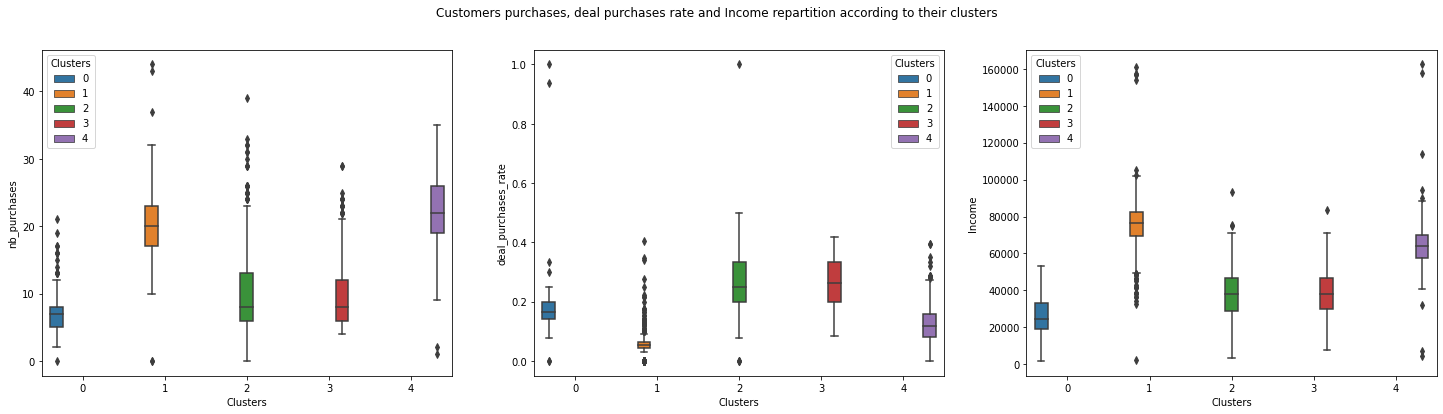

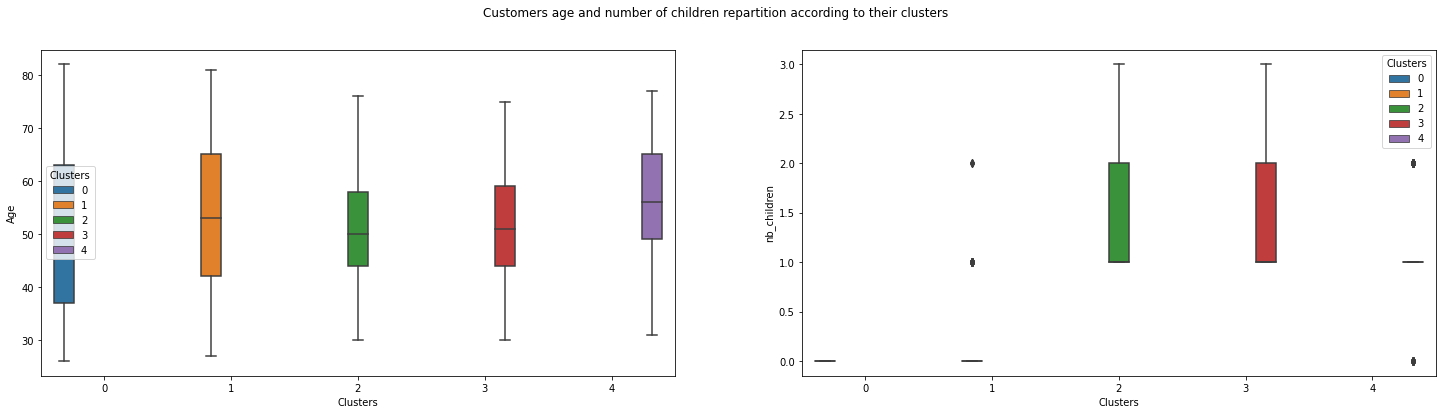

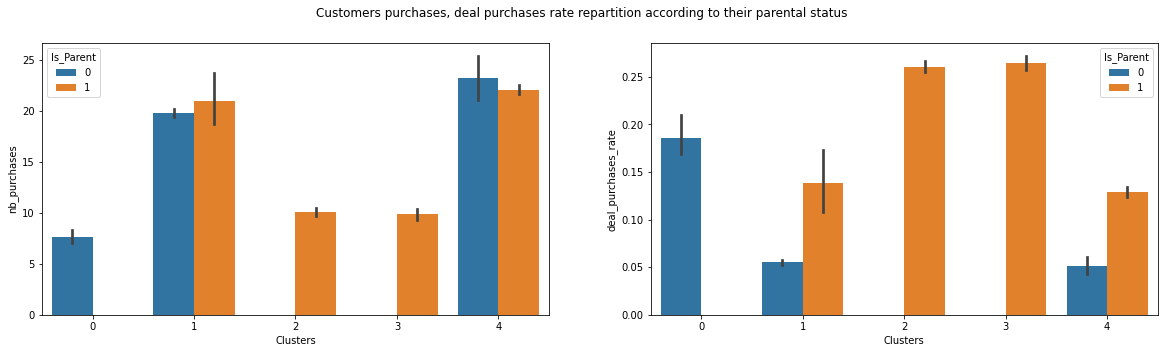

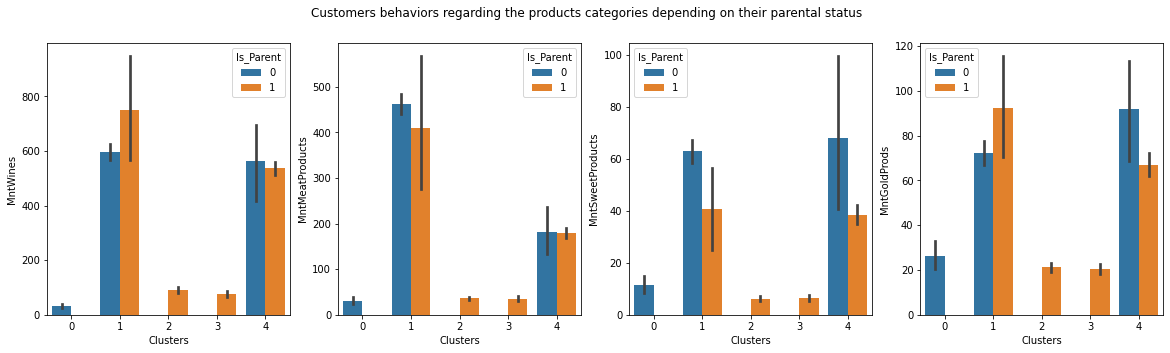

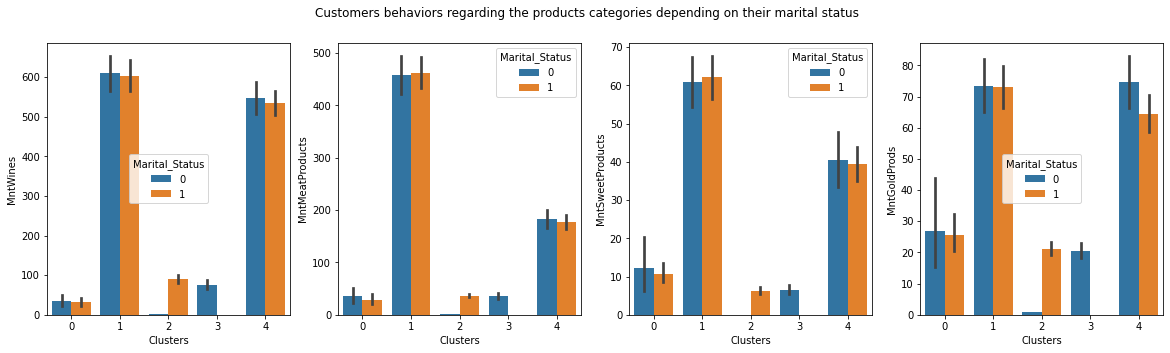

In [124]:
features_to_compare = ["nb_purchases",'deal_purchases_rate','Income']
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
for it,ft in enumerate(features_to_compare):
    sns.boxplot(ax=axes[it],x=df_prep['Clusters'],y=df_prep[ft],hue=df_prep['Clusters'])
plt.suptitle('Customers purchases, deal purchases rate and Income repartition according to their clusters')
plt.show()

features_to_compare = ['Age','nb_children']
fig, axes = plt.subplots(1, 2, figsize=(25, 6))
for it,ft in enumerate(features_to_compare):
    sns.boxplot(ax=axes[it],x=df_prep['Clusters'],y=df_prep[ft],hue=df_prep['Clusters'])
plt.suptitle('Customers age and number of children repartition according to their clusters')
plt.show()

features_to_compare = ["nb_purchases",'deal_purchases_rate']
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
for it,ft in enumerate(features_to_compare):
    sns.barplot(ax=axes[it],data=df_prep,x='Clusters',hue="Is_Parent",y=ft)
plt.suptitle('Customers purchases, deal purchases rate repartition according to their parental status')
plt.show()

features_to_compare = ["MntWines", 'MntMeatProducts','MntSweetProducts','MntGoldProds']
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for it,ft in enumerate(features_to_compare):
    sns.barplot(ax=axes[it],data=df_prep,x='Clusters',hue="Is_Parent",y=ft)
plt.suptitle('Customers behaviors regarding the products categories depending on their parental status')
plt.show()

features_to_compare = ["MntWines", 'MntMeatProducts','MntSweetProducts','MntGoldProds']
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for it,ft in enumerate(features_to_compare):
    sns.barplot(ax=axes[it],data=df_prep,x='Clusters',hue="Marital_Status",y=ft)
plt.suptitle('Customers behaviors regarding the products categories depending on their marital status')
plt.show()

As a result of cluster analysis, we received five groups of buyers (clusters):

* Parents : clusters 2 and 3 
* Not parents : clusters 0, 1, 4
* Perform the most purchases : Cluster 4 (avg 22) and cluster 1 (avg 20)
* Perform the most deal purchases : cluster 

### cluster 1:

### cluster 2:

### cluster 3:

### cluster 4:

### cluster 5: